In [1]:
import dd
import sys
sys.path.append('/home/bentley/git/FLiT/scripts/flitcli')
import flit_bisect as bisect
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 2**10
k = 2**4
I = list(np.arange(N))
Ians = list(np.linspace(0, N-1, k, dtype=int))
sum(x in I for x in Ians)

16

In [3]:
test_count = 0
def test(X):
    global test_count
    test_count += 1
    return sum(x in X for x in Ians) != k

score_func_count = 0
def score_func(X):
    global score_func_count
    score_func_count += 1
    return sum(x for x in Ians if x in X)

In [4]:
test_count = 0
dd.dd(I, test)
test_count

1209

In [5]:
score_func_count = 0
bisect.bisect_search(score_func, I)
score_func_count

171

In [6]:
def create_space(N, k):
    I = list(np.arange(N))
    Ians = list(np.linspace(0, N-1, k, dtype=int))
    return I, Ians

In [7]:
def count_dd(N, k):
    I, Ians = create_space(N, k)
    test_count = [0]
    def test(X):
        test_count[0] += 1
        return sum(x in X for x in Ians) != k
    dd.dd(I, test)
    return test_count[0]

In [8]:
def count_bisect(N, k):
    I, Ians = create_space(N, k)
    test_count = [0]
    def test(X):
        test_count[0] += 1
        return sum(x for x in Ians if x in X)
    bisect.bisect_search(test, I)
    return test_count[0]

In [9]:
count_dd(2**10, 3)

132

In [10]:
count_bisect(2**10, 3)

26

In [11]:
Ks = list(range(50))
N = 2**10
dd_counts = [count_dd(N, k) for k in Ks]
bisect_counts = [count_bisect(N, k) for k in Ks]

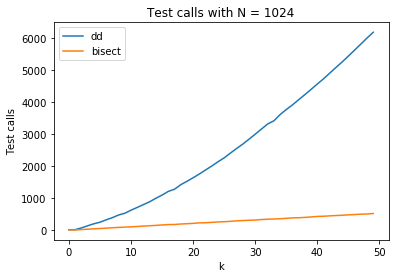

In [12]:
plt.plot(Ks, dd_counts)
plt.plot(Ks, bisect_counts)
plt.title(f'Test calls with N = {N}')
plt.xlabel('k')
plt.ylabel('Test calls')
plt.legend(['dd', 'bisect'])
plt.show()

In [13]:
k = 16
Ns = [2**i for i in range(4, 20)]
dd_counts = [count_dd(N, k) for N in Ns]
bisect_counts = [count_bisect(N, k) for N in Ns]

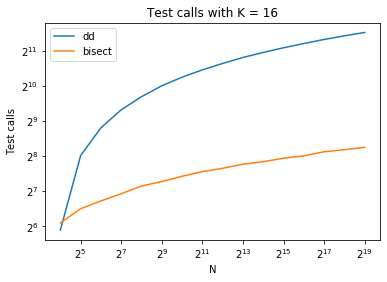

In [14]:
plt.loglog(Ns, dd_counts, basex=2, basey=2)
plt.loglog(Ns, bisect_counts, basex=2, basey=2)
plt.title(f'Test calls with K = {k}')
plt.xlabel('N')
plt.ylabel('Test calls')
plt.legend(['dd', 'bisect'])
plt.show()

In [15]:
k = 4
Ns = [2**i for i in range(4, 20)]
dd_counts = [count_dd(N, k) for N in Ns]
bisect_counts = [count_bisect(N, k) for N in Ns]

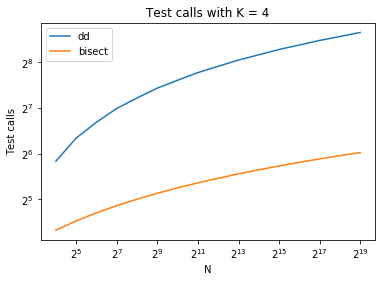

In [16]:
plt.loglog(Ns, dd_counts, basex=2, basey=2)
plt.loglog(Ns, bisect_counts, basex=2, basey=2)
plt.title(f'Test calls with K = {k}')
plt.xlabel('N')
plt.ylabel('Test calls')
plt.legend(['dd', 'bisect'])
plt.show()